In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [3]:
train = pd.merge(pd.read_csv('dengue_features_train.csv'),
                 pd.read_csv('dengue_labels_train.csv'))
test = pd.read_csv('dengue_features_test.csv', index_col='week_start_date', parse_dates=True)
sample_submission = pd.read_csv('submission_format.csv')

In [4]:
train.shape, test.shape

((1456, 25), (416, 23))

In [5]:
train.set_index('week_start_date', inplace=True, drop=True)
train.index = pd.to_datetime(train.index)

train.drop(['year', 'weekofyear'], axis=1, inplace=True)
test.drop(['year', 'weekofyear'], axis=1, inplace=True)

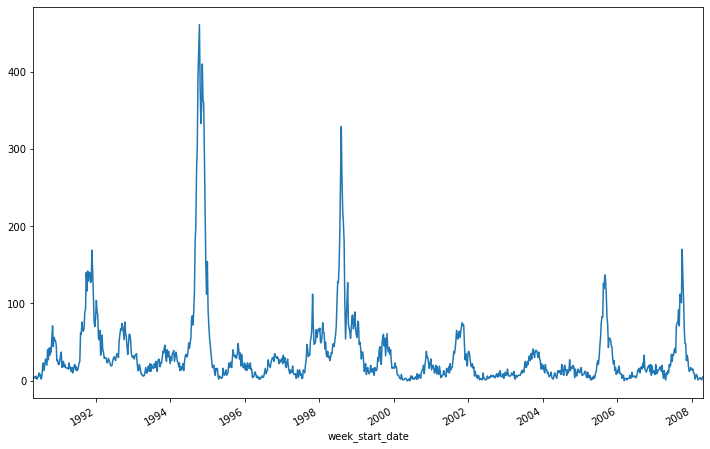

In [6]:
train[train['city'] == 'sj']['total_cases'].plot(figsize=(12, 8));

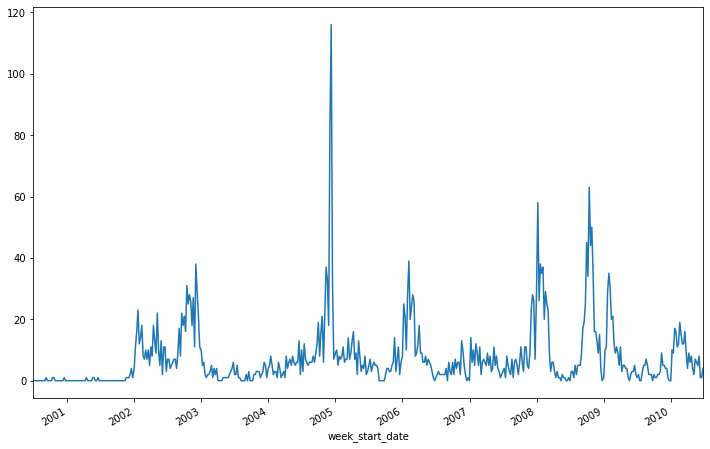

In [7]:
train[train['city'] == 'iq']['total_cases'].plot(figsize=(12, 8));

In [8]:
train[train['city'] == 'sj'].head(5)

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,sj,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,sj,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


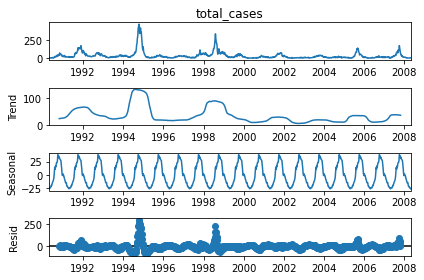

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train[train['city'] == 'sj']['total_cases'], model='add', period=52)
result.plot();

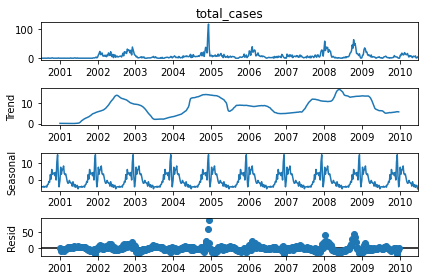

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train[train['city'] == 'iq']['total_cases'], model='add', period=52)
result.plot();

In [11]:
adf_test(train[train['city'] == 'sj']['total_cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.650078e+00
p-value                 5.147319e-09
# lags used             9.000000e+00
# observations          9.260000e+02
critical value (1%)    -3.437432e+00
critical value (5%)    -2.864666e+00
critical value (10%)   -2.568435e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
adf_test(train[train['city'] == 'iq']['total_cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.085429e+00
p-value                 1.067252e-07
# lags used             4.000000e+00
# observations          5.150000e+02
critical value (1%)    -3.443112e+00
critical value (5%)    -2.867168e+00
critical value (10%)   -2.569768e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [13]:
len(train[train['city'] == 'sj'])

936

In [14]:
train_sj = train[train['city'] == 'sj'].iloc[:833]
val_sj = train[train['city'] == 'sj'].iloc[832:]

In [15]:
len(val_sj)

104

In [16]:
len(train[train['city'] == 'iq'])

520

In [17]:
train_iq = train[train['city'] == 'iq'].iloc[:417]
val_iq = train[train['city'] == 'iq'].iloc[416:]

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 52
alpha = 2/(span+1)

model = SimpleExpSmoothing(train_sj['total_cases'])
fitted_model_sj = model.fit(smoothing_level=alpha, optimized=False)

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
y_pred_sj = fitted_model_sj.forecast(104).rename('Simple Exp Smoothing')

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


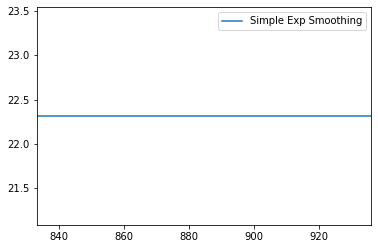

In [20]:
y_pred_sj.plot(legend=True);

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_sj['total_cases'], y_pred_sj)

19.12860645749847

In [22]:
model = SimpleExpSmoothing(train_iq['total_cases'])
fitted_model_iq = model.fit(smoothing_level=alpha, optimized=False)

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [23]:
y_pred_iq = fitted_model_iq.forecast(104).rename('Simple Exp Smoothing')

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


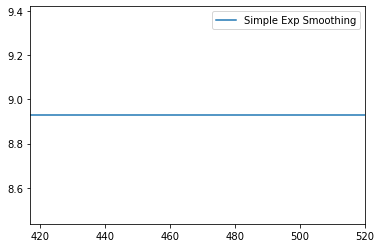

In [24]:
y_pred_iq.plot(legend=True);

In [25]:
mean_absolute_error(val_iq['total_cases'], y_pred_iq)

7.638724545108916

In [26]:
val_sj.tail()

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
2008-03-25,sj,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
2008-04-01,sj,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
2008-04-08,sj,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
2008-04-15,sj,0.00180,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
2008-04-22,sj,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,...,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5


In [27]:
train_sj = train[train['city'] == 'sj']
train_iq = train[train['city'] == 'iq']

In [28]:
model = SimpleExpSmoothing(train_sj['total_cases'])
fitted_model_sj = model.fit(smoothing_level=alpha, optimized=False)

y_pred_sj = fitted_model_sj.forecast(260).rename('SJ Simple Exp Smoothing')

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [29]:
model = SimpleExpSmoothing(train_iq['total_cases'])
fitted_model_iq = model.fit(smoothing_level=alpha, optimized=False)

y_pred_iq = fitted_model_iq.forecast(156).rename('IQ Simple Exp Smoothing')

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [30]:
test = pd.concat([y_pred_sj, y_pred_iq])

In [31]:
test = pd.DataFrame(test)
test.columns = ['total_cases']
test.reset_index(inplace=True, drop=True)
test = test.astype(int)

In [32]:
sample_submission['total_cases'] = test['total_cases']


In [33]:
sample_submission.to_csv('simpleexpsmoothing.csv', index=False)

## ARMA / ARIMA

In [34]:
from pmdarima import auto_arima

train_sj = train[train['city'] == 'sj'].iloc[:833]
val_sj = train[train['city'] == 'sj'].iloc[832:]

start=len(train)
end=len(train)+len(test)-1

start_sj = len(train_sj)
end_sj = len(train_sj) + len(val_sj) - 1
# end_sj = len(train_sj) + 260

start_iq = len(train_iq)
end_iq = len(train_iq) + len(val_iq) - 1
# end_iq = len(train_iq) + 156

In [35]:
auto_arima(train[train['city'] == 'sj']['total_cases'],seasonal=False, start_q=0, start_p=0, max_q=4, max_p=4, m=52, trace=True).summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=7542.030, BIC=7551.711, Time=0.015 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=7526.576, BIC=7541.098, Time=0.060 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=7529.382, BIC=7543.904, Time=0.080 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=7540.030, BIC=7544.871, Time=0.009 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=7521.413, BIC=7540.775, Time=0.093 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=7523.396, BIC=7547.599, Time=0.119 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=7523.264, BIC=7547.467, Time=0.175 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=7519.709, BIC=7539.071, Time=0.139 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=7521.705, BIC=7545.907, Time=0.212 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=7521.966, BIC=7541.329, Time=0.100 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  936
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3755.854
Date:                Wed, 17 Jun 2020   AIC                           7519.709
Time:                        00:06:10   BIC                           7539.071
Sample:                             0   HQIC                          7527.092
                                - 936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.189      0.003      0.998      -0.369       0.371
ar.L1          0.7122      0.042     17.027      0.000       0.630       0.794
ma.L1         -0.5937      0.049    -12.015      0.000      -0.691      -0.497
sigma2       180.5470      3.285     54.963      0.000     174.109     186.985
===================================================================================
Ljung-Box (Q):                       62.16   Jarque-Bera (JB):              5003.33
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

# model = ARIMA(train['Inventories'],order=(1,1,1))
# results = model.fit()
# results.summary()


# model = ARMA(train[train['city'] == 'sj']['total_cases'],order=(1,1))
model = ARMA(train_sj['total_cases'],order=(1,1))
results = model.fit()
results.summary()

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  833
Model:                     ARMA(1, 1)   Log Likelihood               -3347.294
Method:                       css-mle   S.D. of innovations             13.434
Date:                Wed, 17 Jun 2020   AIC                           6702.588
Time:                        00:06:10   BIC                           6721.489
Sample:                             0   HQIC                          6709.835
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                33.7987     11.983      2.820      0.005      10.312      57.286
ar.L1.total_cases     0.9562      0.010     93.812      0.000       0.936       0.976
ma.L1.total_cases     0.1568      0.031      5.042      0.000       0.096       0.218
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0458           +0.0000j            1.0458            0.0000
MA.1           -6.3772           +0.0000j            6.3772            0.5000
-----------------------------------------------------------------------------
"""

In [37]:
y_pred_sj = results.predict(start=start_sj, end=end_sj, dynamic=False, typ='levels').rename('ARMA(1,1) Predictions')

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [38]:
y_pred_sj

833     4.175039
834     5.472932
835     6.713961
836     7.900617
837     9.035282
         ...    
932    33.447648
933    33.463029
934    33.477737
935    33.491800
936    33.505247
Name: ARMA(1,1) Predictions, Length: 104, dtype: float64

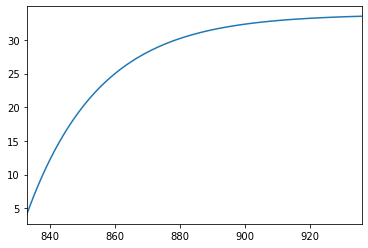

In [39]:
y_pred_sj.plot();

In [40]:
mean_absolute_error(val_sj['total_cases'], y_pred_sj)

19.91536612473567

In [41]:
auto_arima(train[train['city'] == 'iq']['total_cases'],seasonal=False, start_q=0, start_p=0, max_q=4, max_p=4, m=52, trace=True).summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=3589.477, BIC=3597.981, Time=0.009 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=3574.407, BIC=3587.163, Time=0.069 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=3556.408, BIC=3569.164, Time=0.045 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=3587.477, BIC=3591.729, Time=0.007 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=3525.437, BIC=3542.444, Time=0.267 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=3532.478, BIC=3549.486, Time=0.066 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=3534.436, BIC=3555.695, Time=0.104 seconds
Fit ARIMA(0,1,3)x(0,0,0,0) [intercept=True]; AIC=3534.419, BIC=3555.678, Time=0.111 seconds
Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=3536.404, BIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1758.718
Date:                Wed, 17 Jun 2020   AIC                           3525.437
Time:                        00:06:11   BIC                           3542.444
Sample:                             0   HQIC                          3532.100
                                - 520                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.004      0.918      0.359      -0.004       0.010
ar.L1          0.7410      0.016     46.892      0.000       0.710       0.772
ma.L1         -1.0000      1.855     -0.539      0.590      -4.635       2.635
sigma2        50.9635     93.995      0.542      0.588    -133.263     235.190
===================================================================================
Ljung-Box (Q):                       54.38   Jarque-Bera (JB):             19344.93
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                             2.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model = ARMA(train_iq['total_cases'],order=(1,1))
results = model.fit()
results.summary()

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  520
Model:                     ARMA(1, 1)   Log Likelihood               -1759.056
Method:                       css-mle   S.D. of innovations              7.121
Date:                Wed, 17 Jun 2020   AIC                           3526.112
Time:                        00:06:11   BIC                           3543.127
Sample:                             0   HQIC                          3532.777
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.4723      1.408      5.307      0.000       4.712      10.232
ar.L1.total_cases     0.8162      0.039     21.062      0.000       0.740       0.892
ma.L1.total_cases    -0.1648      0.077     -2.150      0.032      -0.315      -0.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2251           +0.0000j            1.2251            0.0000
MA.1            6.0680           +0.0000j            6.0680            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
y_pred_iq = results.predict(start=start_iq, end=end_iq, dynamic=False, typ='levels').rename('ARMA(1,1) Predictions')

c:\users\user\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


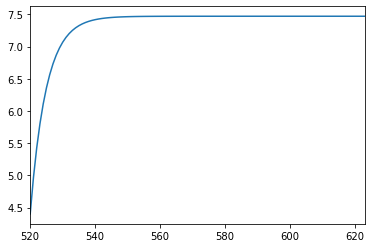

In [44]:
y_pred_iq.plot();

In [45]:
mean_absolute_error(val_iq['total_cases'], y_pred_iq)

7.2407152720372645

In [46]:
train[train['city'] == 'sj']['total_cases']

week_start_date
1990-04-30    4
1990-05-07    5
1990-05-14    4
1990-05-21    3
1990-05-28    6
             ..
2008-03-25    4
2008-04-01    3
2008-04-08    1
2008-04-15    3
2008-04-22    5
Name: total_cases, Length: 936, dtype: int64

## Lets try a VAR model

In [47]:
from statsmodels.tsa.api import VAR

In [95]:
train_sj = train[train['city'] == 'sj'].iloc[:833]
val_sj = train[train['city'] == 'sj'].iloc[832:]

train_sj = train_sj.drop(['city'], axis=1)
val_sj = val_sj.drop(['city'], axis=1)

train_iq = train[train['city'] == 'iq'].iloc[:417]
val_iq = train[train['city'] == 'iq'].iloc[416:]

train_iq = train_iq.drop(['city'], axis=1)
val_iq = val_iq.drop(['city'], axis=1)

In [96]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

train_sj = imputer.fit_transform(train_sj[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases']])
val_sj = imputer.transform(val_sj[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases']])

train_iq = imputer.fit_transform(train_iq[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases']])
val_iq = imputer.transform(val_iq[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases']])

# train_sj = pd.DataFrame(train_sj)
# val_sj = pd.DataFrame(val_sj)

In [97]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    model = VAR(train_sj)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    model_iq = VAR(train_iq)
    results = model_iq.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -24.35733297895741
BIC:  -23.607878793634814

Order = 2
AIC:  -24.660831646589482
BIC:  -23.223015355255633

Order = 3
AIC:  -24.714372407748023
BIC:  -22.58688661004236

Order = 4
AIC:  -24.637957133212986
BIC:  -21.81949033370518

Order = 5
AIC:  -24.576826647599077
BIC:  -21.06606323805642

Order = 6
AIC:  -24.495371100264737
BIC:  -20.290991341821616

Order = 7
AIC:  -24.366197321573097
BIC:  -19.466877326801914

Order = 8
AIC:  -24.243147151044255
BIC:  -18.647558865927103

Order = 9
AIC:  -24.129666042944166
BIC:  -17.836477228744627

Order = 10
AIC:  -24.01620931806667
BIC:  -17.024083533101056

Order = 11
AIC:  -23.904250714988656
BIC:  -16.211847296295964

Order = 12
AIC:  -23.821236377523363
BIC:  -15.427210422433348

Order = 13
AIC:  -23.75538203748024
BIC:  -14.658384385078843

Order = 14
AIC:  -23.702617024262473
BIC:  -13.901294236753944

Order = 15
AIC:  -23.604520331792035
BIC:  -13.09751467575705

Order = 1
AIC:  -17.459729532080303
BIC:  -16.1807620937

In [98]:
results_sj = model.fit(3)
results_iq = model_iq.fit(1)

In [99]:
y_pred_sj = results_sj.forecast(steps=104, y=val_sj[-3:])
y_pred_iq = results_iq.forecast(steps=104, y=val_sj[-1:])

In [100]:
df_y_pred_sj = pd.DataFrame(y_pred_sj, columns=['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases'])
df_val_sj = pd.DataFrame(val_sj, columns=['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                          'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                          'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases'])

df_y_pred_iq = pd.DataFrame(y_pred_iq, columns=['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases'])
df_val_iq = pd.DataFrame(val_iq, columns=['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                          'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                          'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases'])


In [101]:
mean_absolute_error(df_val_sj['total_cases'], df_y_pred_sj['total_cases'])

23.54832601411221

In [102]:
mean_absolute_error(df_val_iq['total_cases'], df_y_pred_iq['total_cases'])

7.2799938028902185

In [103]:
train_sj = train[train['city'] == 'sj']
train_iq = train[train['city'] == 'iq']

train_sj = train_sj.drop(['city'], axis=1)

train_iq = train_iq.drop(['city'], axis=1)

In [104]:
imputer = SimpleImputer()

train_sj = imputer.fit_transform(train_sj[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases']])

train_iq = imputer.fit_transform(train_iq[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw', 'reanalysis_min_air_temp_k',
                                                'station_min_temp_c', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c',
                                                'station_max_temp_c', 'reanalysis_max_air_temp_k', 'total_cases']])

In [105]:
model = VAR(train_sj)
model_iq = VAR(train_iq)

results_sj = model.fit(3)
results_iq = model_iq.fit(1)

In [106]:
y_pred_sj = results_sj.forecast(steps=260, y=val_sj[-3:])
y_pred_iq = results_iq.forecast(steps=156, y=val_sj[-1:])

In [112]:
test = np.concatenate([y_pred_sj[:, -1], y_pred_iq[:, -1]])

In [113]:
test = pd.DataFrame(test)
test.columns = ['total_cases']
test.reset_index(inplace=True, drop=True)
test = test.astype(int)

In [114]:
sample_submission['total_cases'] = test['total_cases']

In [118]:
sample_submission.to_csv('VAR.csv', index=False)

In [62]:
# train_sj

# from statsmodels.tsa.holtwinters import ExponentialSmoothing
#
# train['dbl_exp_sm'] = ExponentialSmoothing(train[train['city'] == 'sj']['total_cases'], trend='add').fit().fittedvalues.shift(-1)
# train.head()

In [63]:

# train[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);
